# PRE PROCESSING THE DATA #

In [185]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [186]:
# Reading the csv file
df = pd.read_csv("Mental Health survey.csv")

In [187]:
# Top 5 rows of the dataset
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [188]:
#Shape of the dataset 
print("rows","columns")
df.shape

rows columns


(1259, 27)

In [245]:
#checking information for null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1247 entries, 0 to 1258
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   age                        1247 non-null   int64   
 1   gender                     1247 non-null   category
 2   self_employed              1229 non-null   category
 3   family_history             1247 non-null   category
 4   treatment                  1247 non-null   category
 5   work_interfere             986 non-null    category
 6   no_employees               1247 non-null   category
 7   remote_work                1247 non-null   category
 8   tech_company               1247 non-null   category
 9   benefits                   1247 non-null   category
 10  care_options               1247 non-null   category
 11  wellness_program           1247 non-null   category
 12  seek_help                  1247 non-null   category
 13  anonymity                  1247 non-nu

In [190]:
#Checking statistical description
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [191]:
# cheking null data
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

# DATA CLEANING 

In [192]:
# Strip and lower column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [193]:
# Drop irrelevant columns
df.drop(columns=["comments", "state", "timestamp","country"], inplace=True, errors='ignore')

In [194]:
# Drop rows with too many missing values
df.dropna(thresh=0.7*len(df.columns), inplace=True)

In [195]:
# Clean gender column
def clean_gender(g):
    g = str(g).lower()
    if 'female' in g or g in ['f', 'woman']:
        return 'Female'
    elif 'male' in g or g in ['m', 'man']:
        return 'Male'
    else:
        return 'Other'
        df['gender'] = df['gender'].apply(clean_gender)

In [196]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [197]:
# Fix age values (plausible range: 18-100)
df = df[(df['age'] >= 18) & (df['age'] <= 100)]

In [198]:
# showcasing the cleaning data 
df.head()

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


# DATA TRANSFORMATION #

In [199]:
# Convert object columns to categorical
for col in df.select_dtypes(include='object'):
    df[col] = df[col].astype('category')

In [200]:
# Encode target variable
df['treatment'] = df['treatment'].map({'Yes': 1, 'No': 0})

In [201]:
# Encode other categorical features using one-hot encoding
df_encoded = pd.get_dummies(df.drop(columns=['treatment']), drop_first=True)

In [202]:
# Final feature set
X = df_encoded
y = df['treatment']

In [203]:
# showcasing top 5 rows of transformed data
df.head(-1)

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,1,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,0,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,0,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,1,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,0,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,36,Male,No,Yes,0,Rarely,More than 1000,No,No,Don't know,...,Don't know,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No
1254,26,male,No,No,1,NaN,26-100,No,Yes,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,No,Yes,1,Often,26-100,Yes,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,No,Yes,1,Sometimes,More than 1000,No,Yes,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No


# EXPLORATORY DATA ANALYSIS 

## UNIVARIATE ANALYSIS

### Visualization of Age Distribution

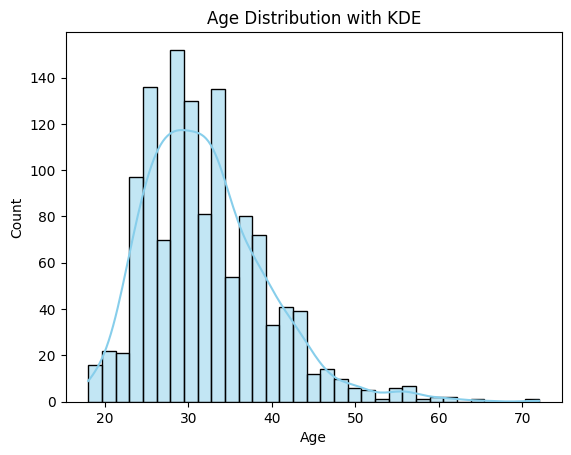

In [204]:
sns.histplot(df['age'], kde=True, color='skyblue')
plt.title("Age Distribution with KDE")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Visualisation of Gender Distribution 

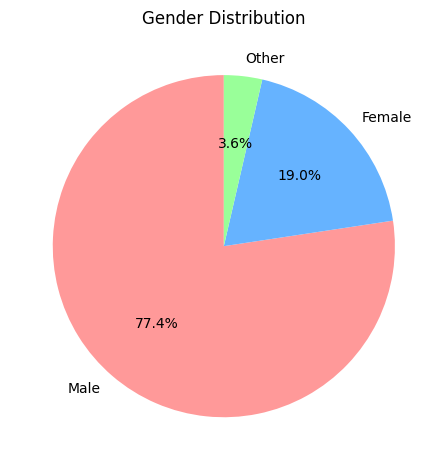

In [205]:
# Simplified gender grouping
df['gender_cleaned'] = df['gender'].str.lower().map({
    'male': 'Male', 'm': 'Male', 'cis male': 'Male',
    'female': 'Female', 'f': 'Female', 'cis female': 'Female'
}).fillna('Other')

# Pie chart
df['gender_cleaned'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['#ff9999', '#66b3ff', '#99ff99'],
    startangle=90,
    ylabel='',
    title='Gender Distribution'
)

plt.tight_layout()
plt.show()

### Visualisation of Work Interference Frequency 

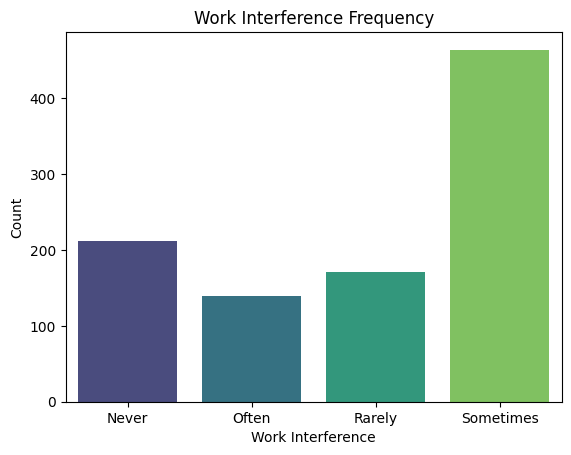

In [206]:
sns.barplot(x=df['work_interfere'].value_counts().index,
            y=df['work_interfere'].value_counts().values,
            palette="viridis")
plt.title("Work Interference Frequency")
plt.xlabel("Work Interference")
plt.ylabel("Count")
plt.show()


### VISUALISATION OF FAMILY HISTORY OF MENTAL ILLNESS

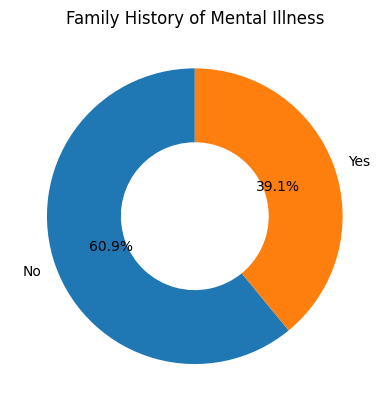

In [207]:
labels = df['family_history'].value_counts().index
sizes = df['family_history'].value_counts().values
plt.pie(sizes, labels=labels, startangle=90, wedgeprops=dict(width=0.5), autopct='%1.1f%%')
plt.title("Family History of Mental Illness")
plt.show()


## MULTIVARIATE ANALYSIS

### VISUALISATION OF AGE VS WORK INTERFERENCE

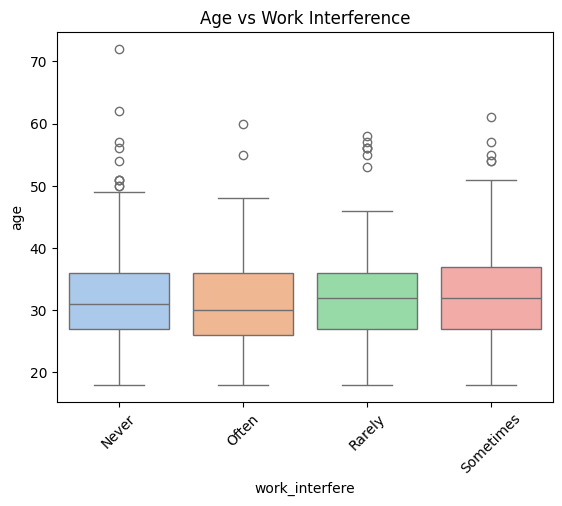

In [208]:
sns.boxplot(x='work_interfere', y='age', data=df, palette='pastel')
plt.title("Age vs Work Interference")
plt.xticks(rotation=45)
plt.show()

### VISUALISATION OF GENDER VS TREATMENT

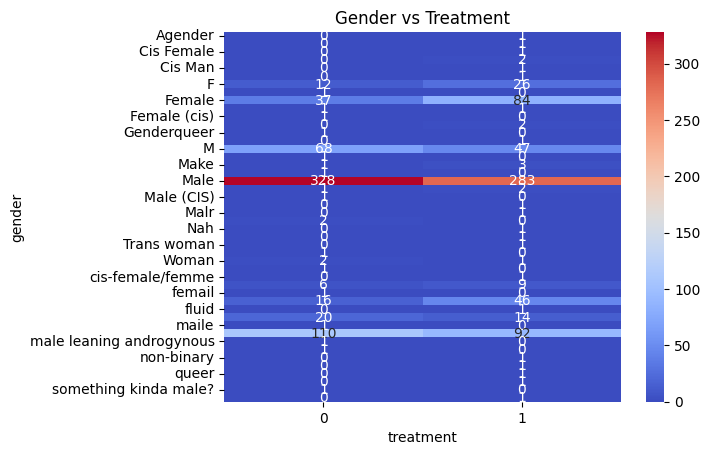

In [209]:
cross = pd.crosstab(df['gender'], df['treatment'])
sns.heatmap(cross, annot=True, cmap='coolwarm', fmt='d')
plt.title("Gender vs Treatment")
plt.show()


### VISUALISATION OF AGE BY TREATMENT

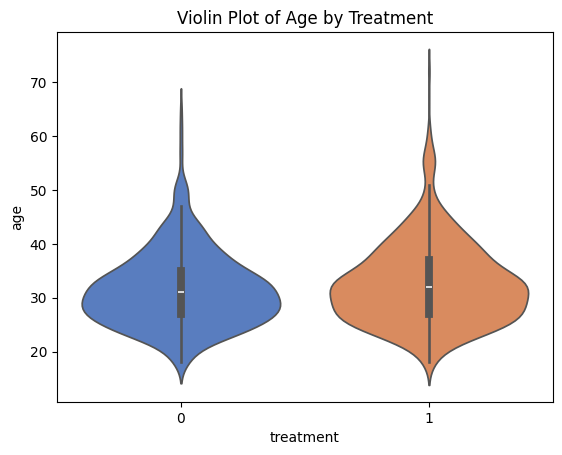

In [210]:
sns.violinplot(x="treatment", y="age", data=df, palette="muted")
plt.title("Violin Plot of Age by Treatment")
plt.show()

### VISUALISATION OF AGE BY GENDER AND TREATMENT

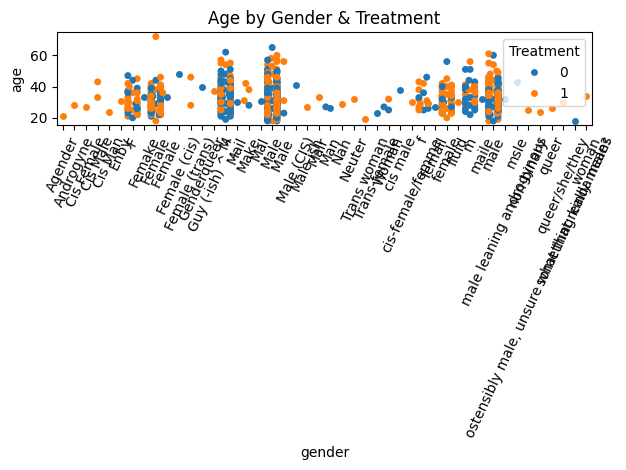

In [211]:
sns.swarmplot(x='gender', y='age', hue='treatment',data=df)
plt.title("Age by Gender & Treatment")
plt.legend(title='Treatment')
plt.xticks(rotation=65)
plt.tight_layout()
plt.show()

### VISUALISATION OF MENTAL HEALTH BENEFITS BY TREATMENT

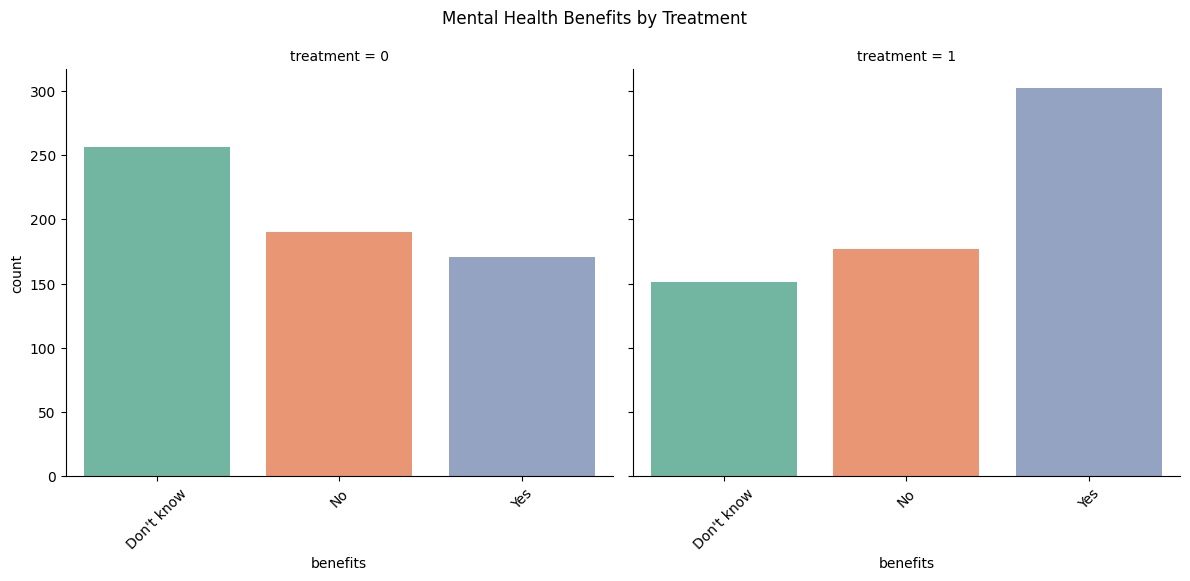

In [212]:
#TREATMENT 0= NO TREATMENT, TREATMENT 1 = TREATMENT TAKEN
g = sns.catplot(x="benefits", col="treatment", data=df, kind="count", height=5, aspect=1.2,palette= "Set2")
g.set_xticklabels(rotation=45)
plt.suptitle("Mental Health Benefits by Treatment", y=1.05)
plt.show()

### VISUALISATION OF ALL THE NUMERICAL FEATURES WITH TREATMENT

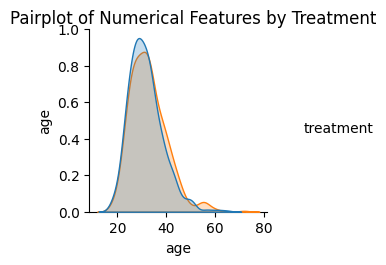

In [213]:
# Ensuring 'treatment' is categorical
df['treatment'] = df['treatment'].astype('category')

# Select only numeric columns + treatment for hue
cols = ['age', 'no_employees', 'treatment']

sns.pairplot(df[cols], hue='treatment')
plt.suptitle("Pairplot of Numerical Features by Treatment", y=1.02)
plt.show()


### VISUALISATION OF AGE VS COMFORT DISCUSSING MENTAL HEALTH WITH COWORKERS

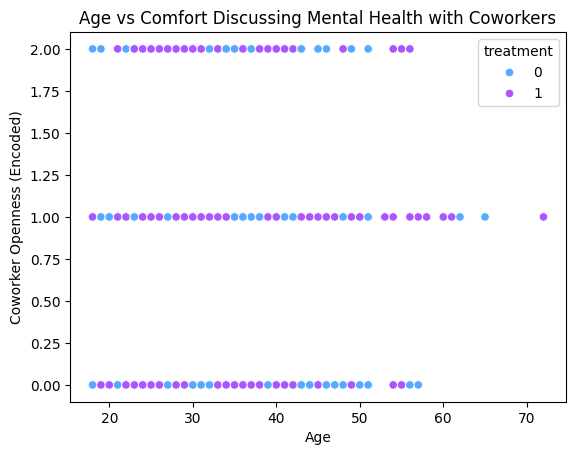

In [214]:
df['coworkers_encoded'] = df['coworkers'].astype('category').cat.codes

sns.scatterplot(x='age', y='coworkers_encoded', hue='treatment', data=df, palette='cool')
plt.title("Age vs Comfort Discussing Mental Health with Coworkers")
plt.xlabel("Age")
plt.ylabel("Coworker Openness (Encoded)")
plt.show()

### VISUALISATION OF AGE VS WILLINGNESS TO SEEK HELP

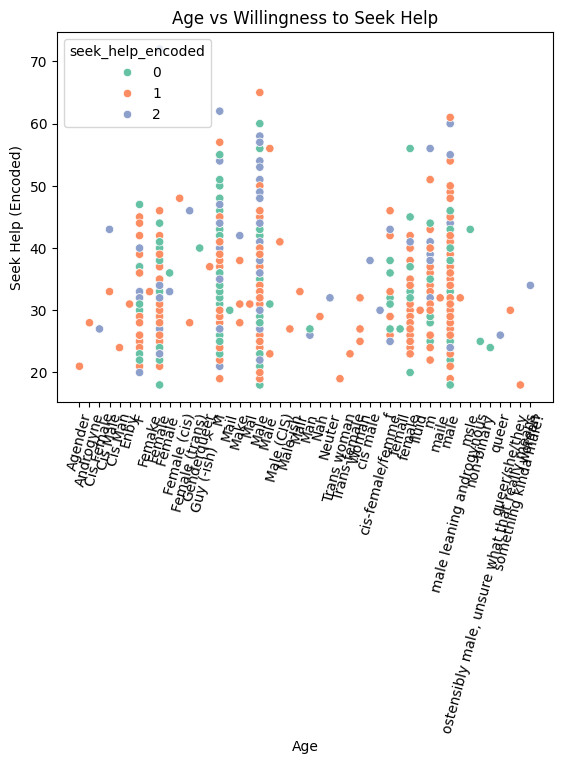

In [215]:
# Encode 'seek_help'
df['seek_help_encoded'] = df['seek_help'].astype('category').cat.codes

sns.scatterplot(x='gender', y='age', hue='seek_help_encoded', data=df, palette='Set2')
plt.title("Age vs Willingness to Seek Help")
plt.xlabel("Age")
plt.ylabel("Seek Help (Encoded)")
plt.xticks(rotation = 75)
plt.show()


# MODEL BUILDING

In [239]:
# 1. Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [243]:
# Sample preprocessing
df_clean = df.dropna()
X = df_clean.drop("treatment", axis=1)
y = df_clean["treatment"]

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)
y = LabelEncoder().fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [242]:
# Models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}
# Train & evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n🔍 {name}")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
    print("F1 Score:", round(f1_score(y_test, y_pred), 2))
    print("Classification Report:\n", classification_report(y_test, y_pred))


🔍 Logistic Regression
Accuracy: 0.79
F1 Score: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.62      0.67        65
           1       0.82      0.88      0.85       129

    accuracy                           0.79       194
   macro avg       0.77      0.75      0.76       194
weighted avg       0.79      0.79      0.79       194


🔍 Decision Tree
Accuracy: 0.66
F1 Score: 0.74
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.57      0.53        65
           1       0.77      0.71      0.74       129

    accuracy                           0.66       194
   macro avg       0.63      0.64      0.64       194
weighted avg       0.68      0.66      0.67       194


🔍 Random Forest
Accuracy: 0.76
F1 Score: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.52      0.60        65
           1      

## DEFINING THE MODEL

In [244]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define the models
logreg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=45)

## TRAINING THE MODEL

In [219]:
# Train the models
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=45)

## EVALUATING THE MODELS & PLOTTING CONFUSION MATRIX

In [233]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, ConfusionMatrixDisplay
)

# Define evaluation function
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\nModel: {name}")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
    print("Precision:", round(precision_score(y_test, y_pred), 2))
    print("Recall:", round(recall_score(y_test, y_pred), 2))
    print("F1 Score:", round(f1_score(y_test, y_pred), 2))
    print("ROC AUC Score:", round(roc_auc_score(y_test, y_proba), 2))
    
    # Plot confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f"{name} - Confusion Matrix")
    plt.show()




Model: Logistic Regression
Accuracy: 0.84
Precision: 0.8
Recall: 0.93
F1 Score: 0.86
ROC AUC Score: 0.9


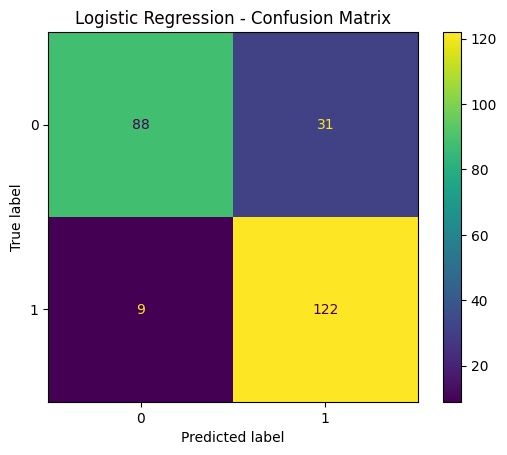


Model: Random Forest
Accuracy: 0.79
Precision: 0.76
Recall: 0.88
F1 Score: 0.82
ROC AUC Score: 0.88


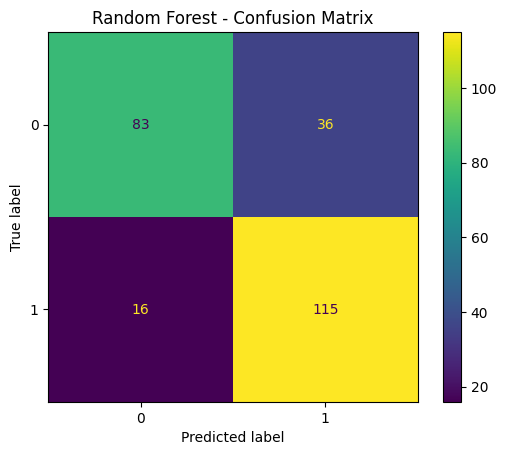

In [234]:
evaluate_model("Logistic Regression", logreg, X_test, y_test)
evaluate_model("Random Forest", rf, X_test, y_test)
